# Data Preprocessing

## Imports

In [2]:
# Basic imports
import pandas as pd
import numpy as np
import copy
import re

# Visualization imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# NLTK imports
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import wordnet, stopwords
from nltk import pos_tag, WordNetLemmatizer

#For Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

#For Vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## Looking at the Data

In [8]:
df = pd.read_csv('/Users/Arsh/Flatiron/Gitlab/Capstone/Full Tweet Dataset', index_col = False)
df_original = copy.deepcopy(df)
df.drop(columns = ['Unnamed: 0'], inplace = True)
df

,Date,Tweet,Username,Political_Score,Democrat_Score,Republican_Score
0,2017-01-03,GOP’s reversal of plans to destroy the OCE wil...,SpeakerPelosi,1,0.0,NaN
1,2017-01-03,Working families expect us to fight for their ...,SpeakerPelosi,1,0.0,NaN
2,2017-01-03,Tmrw @HouseGOP will destroy the office that pr...,SpeakerPelosi,1,0.0,NaN
3,2017-01-03,"We'll seek common ground, but we'll stand our ...",SpeakerPelosi,1,0.0,NaN
4,2017-01-03,I offer my congratulations to the Speaker of t...,SpeakerPelosi,1,0.0,NaN
...,...,...,...,...,...,...
385964,2022-11-18,America is going back to the Moon!\n\nhttps://...,amyklobuchar,1,1.0,NaN
385965,2022-11-18,We’re hiring! Our office is seeking a Policy A...,RepAOC,1,1.0,NaN
385966,2022-11-18,"Unfair, hidden fees known as “junk fees” take ...",POTUS,1,1.0,NaN
385967,2022-11-18,The Constitution is the guarantor of our liber...,RandPaul,0,NaN,0.0


In [12]:
# Sanity check
df.Date = pd.to_datetime(df.Date)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385969 entries, 0 to 385968
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              385969 non-null  datetime64[ns]
 1   Tweet             385969 non-null  object        
 2   Username          385969 non-null  object        
 3   Political_Score   385969 non-null  int64         
 4   Democrat_Score    201555 non-null  float64       
 5   Republican_Score  184414 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 17.7+ MB


,Date,Tweet,Username,Political_Score,Democrat_Score,Republican_Score
0,2017-01-03,GOP’s reversal of plans to destroy the OCE wil...,SpeakerPelosi,1,0.0,NaN
1,2017-01-03,Working families expect us to fight for their ...,SpeakerPelosi,1,0.0,NaN
2,2017-01-03,Tmrw @HouseGOP will destroy the office that pr...,SpeakerPelosi,1,0.0,NaN
3,2017-01-03,"We'll seek common ground, but we'll stand our ...",SpeakerPelosi,1,0.0,NaN
4,2017-01-03,I offer my congratulations to the Speaker of t...,SpeakerPelosi,1,0.0,NaN
...,...,...,...,...,...,...
385964,2022-11-18,America is going back to the Moon!\n\nhttps://...,amyklobuchar,1,1.0,NaN
385965,2022-11-18,We’re hiring! Our office is seeking a Policy A...,RepAOC,1,1.0,NaN
385966,2022-11-18,"Unfair, hidden fees known as “junk fees” take ...",POTUS,1,1.0,NaN
385967,2022-11-18,The Constitution is the guarantor of our liber...,RandPaul,0,NaN,0.0


In [13]:
df.corr()

,Political_Score,Democrat_Score,Republican_Score
Political_Score,1.0,NaN,NaN
Democrat_Score,NaN,1.0,NaN
Republican_Score,NaN,NaN,1.0


In [14]:
df.Tweet.iloc[37493]

'3) These massive Medicaid cuts would also lead to funding cuts for school districts and students with disabilities'

In [15]:
df.loc[df['Democrat_Score'] == 1, 'political_group'] = 'Democratic Liberals'
df.loc[df['Democrat_Score'] == 0, 'political_group'] = 'Democratic Moderates'
df.loc[df['Republican_Score'] == 1, 'political_group'] = 'Republican Conservatives'
df.loc[df['Republican_Score'] == 0, 'political_group'] = 'Republican Moderates'
df

,Date,Tweet,Username,Political_Score,Democrat_Score,Republican_Score,political_group
0,2017-01-03,GOP’s reversal of plans to destroy the OCE wil...,SpeakerPelosi,1,0.0,NaN,Democratic Moderates
1,2017-01-03,Working families expect us to fight for their ...,SpeakerPelosi,1,0.0,NaN,Democratic Moderates
2,2017-01-03,Tmrw @HouseGOP will destroy the office that pr...,SpeakerPelosi,1,0.0,NaN,Democratic Moderates
3,2017-01-03,"We'll seek common ground, but we'll stand our ...",SpeakerPelosi,1,0.0,NaN,Democratic Moderates
4,2017-01-03,I offer my congratulations to the Speaker of t...,SpeakerPelosi,1,0.0,NaN,Democratic Moderates
...,...,...,...,...,...,...,...
385964,2022-11-18,America is going back to the Moon!\n\nhttps://...,amyklobuchar,1,1.0,NaN,Democratic Liberals
385965,2022-11-18,We’re hiring! Our office is seeking a Policy A...,RepAOC,1,1.0,NaN,Democratic Liberals
385966,2022-11-18,"Unfair, hidden fees known as “junk fees” take ...",POTUS,1,1.0,NaN,Democratic Liberals
385967,2022-11-18,The Constitution is the guarantor of our liber...,RandPaul,0,NaN,0.0,Republican Moderates


In [16]:
mod_dems =  df[df['political_group'] == 'Democratic Moderates']
lib_dems =  df[df['political_group'] == 'Democratic Liberals']
mod_reps =  df[df['political_group'] == 'Republican Moderates']
con_reps =  df[df['political_group'] == 'Republican Conservatives']
reps = df[df['Political_Score'] == 0]
dems = df[df['Political_Score'] == 1]

##  Preprocessing

I will clean all of the tweets in my data and get it ready for NLP. 

### Tokenization 

In [17]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
# I removed some stop words as, IMO, they remove context in the tweets that signify meaning.
my_stopwords = ['i',
                'me',
                'my',
                'myself',
                'we',
                'our',
                'ours',
                'ourselves',
                'you',
                "you're",
                "you've",
                "you'll",
                "you'd",
                'your',
                'yours',
                'yourself',
                'yourselves',
                'he',
                'him',
                'his',
                'himself',
                'she',
                "she's",
                'her',
                'hers',
                'herself',
                'it',
                "it's",
                'its',
                'itself',
                'they',
                'them',
                'their',
                'theirs',
                'themselves',
                'what',
                'which',
                'who',
                'whom',
                'this',
                'that',
                "that'll",
                'these',
                'those',
                'am',
                'is',
                'are',
                'was',
                'were',
                'be',
                'been',
                'being',
                'have',
                'has',
                'had',
                'having',
                'do',
                'does',
                'did',
                'doing',
                'a',
                'an',
                'the',
                'and',
                'but',
                'if',
                'or',
                'because',
                'as',
                'until',
                'while',
                'of',
                'at',
                'by',
                'for',
                'with',
                'about',
                'between',
                'into',
                'through',
                'during',
                'before',
                'after',
                'above',
                'below',
                'to',
                'from',
                'up',
                'down',
                'in',
                'out',
                'on',
                'off',
                'over',
                'under',
                'again',
                'further',
                'then',
                'once',
                'here',
                'there',
                'when',
                'where',
                'why',
                'how',
                'all',
                'any',
                'both',
                'each',
                'few',
                'more',
                'most',
                'other',
                'some',
                'such',
                'only',
                'own',
                'same',
                'so',
                'than',
                'too',
                'very',
                's',
                't',
                'can',
                'will',
                'just',
                'don',
                "don't",
                'should',
                "should've",
                'now',
                'd',
                'll',
                'm',
                'o',
                're',
                've',
                'y',
                'ain',
                'aren',
                "aren't",
                'couldn',
                "couldn't",
                'didn',
                "didn't",
                "doesn't",
                'hadn',
                "hadn't",
                'hasn',
                "hasn't",
                'haven',
                "haven't",
                'isn',
                "isn't",
                'ma',
                'mightn',
                "mightn't",
                'mustn',
                "mustn't",
                'needn',
                "needn't",
                'shan',
                "shan't",
                "shouldn't",
                "wasn't",
                "weren't",
                'won',
                "won't",
                "wouldn't"]

In [19]:
df.Tweet.iloc[37493]

'3) These massive Medicaid cuts would also lead to funding cuts for school districts and students with disabilities'

In [20]:
tknzr = TweetTokenizer(
    strip_handles=True, reduce_len=True, preserve_case=False)

The parameters in the tokenizer remove @handles, lowercases all words, and reduces the length of exaggerated grammar (such as turning looooool into loool.)

In [21]:
def tweet_preprocessor(tweet, min_tok):

    wnl = WordNetLemmatizer()

    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        else:
            return None

    tweet_sweeper = tweet.lower()
    tweet_sweeper = re.sub(r"@[a-z0-9_]+|#[a-z0-9_]+|http\S+", "",
                           tweet_sweeper).strip().replace("\r", "").replace("\n", "").replace("\t", "")
    clean_tweet = [x for x in tknzr.tokenize(tweet_sweeper) if (
        (x.isalpha()) & (x not in my_stopwords))]
    wordnet_tagged = list(
        map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(clean_tweet)))

    if len(wordnet_tagged) < min_tok:
        return ''
    else:
        clean_tweet = " ".join([wnl.lemmatize(x[0], x[1])
                               for x in wordnet_tagged if x[1] is not None])
        return clean_tweet

In [22]:
df.Tweet = df.Tweet.apply(tweet_preprocessor, min_tok=8)

In [23]:
processed_tweets = df[df['Tweet'] != '']

In [24]:
processed_tweets.to_csv('Processed Tweets - 8 Tokens')
processed_tweets = pd.read_csv('/Users/Arsh/Flatiron/Gitlab/Capstone/Processed Tweets - 8 Tokens')
processed_tweets = processed_tweets.drop(columns=['Unnamed: 0'])
processed_tweets = processed_tweets.reset_index(drop=True)
processed_tweets

,Date,Tweet,Username,Political_Score,Democrat_Score,Republican_Score,political_group
0,2017-01-03,gop reversal plan destroy not obscure clear co...,SpeakerPelosi,1,0.0,NaN,Democratic Moderates
1,2017-01-03,work family expect fight health economic secur...,SpeakerPelosi,1,0.0,NaN,Democratic Moderates
2,2017-01-03,tmrw destroy office provide independent ethic ...,SpeakerPelosi,1,0.0,NaN,Democratic Moderates
3,2017-01-03,seek common ground stand ground wherever good ...,SpeakerPelosi,1,0.0,NaN,Democratic Moderates
4,2017-01-03,offer congratulation speaker new congress prou...,SpeakerPelosi,1,0.0,NaN,Democratic Moderates
...,...,...,...,...,...,...,...
326342,2022-11-18,really love many teacher single day help kid b...,CoryBooker,1,1.0,NaN,Democratic Liberals
326343,2022-11-18,hire office seek policy advisor portfolio focu...,RepAOC,1,1.0,NaN,Democratic Liberals
326344,2022-11-18,unfair hidden fee know junk fee take real mone...,POTUS,1,1.0,NaN,Democratic Liberals
326345,2022-11-18,constitution guarantor liberties come surprise...,RandPaul,0,NaN,0.0,Republican Moderates


## Data Visualizations

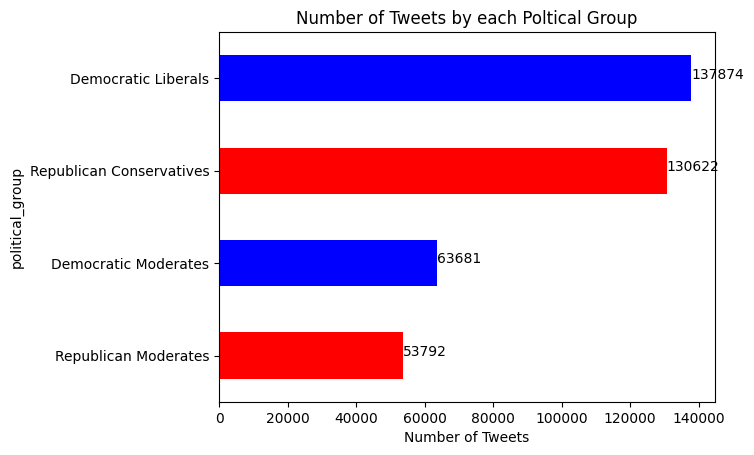

In [25]:
d= df.groupby('political_group').Tweet.count().sort_values()
c = ['red', 'blue', 'red', 'blue']
d.plot.barh(
    ylim=0, title= 'Number of Tweets by each Poltical Group', color = c)
for index, value in enumerate(d):
    plt.text(value, index,
             str(value))
plt.xlabel('Number of Tweets', fontsize = 10);

In [26]:
processed_tweets['political_group'].value_counts(normalize = True)

Democratic Liberals         0.366555
Republican Conservatives    0.313562
Democratic Moderates        0.171881
Republican Moderates        0.148002
Name: political_group, dtype: float64

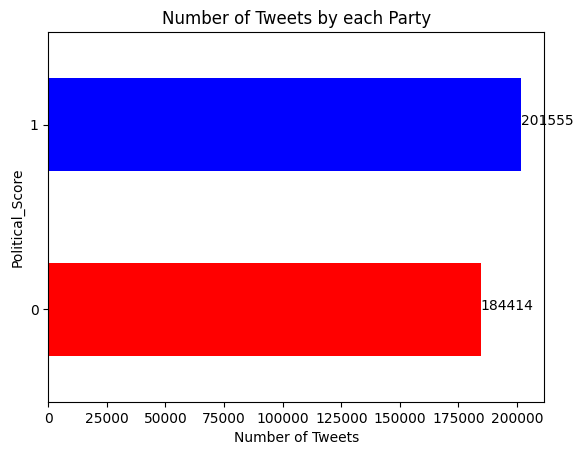

In [27]:
e = df.groupby('Political_Score').Tweet.count().sort_values()
c1 = ['red', 'blue']
e.plot.barh(
    ylim=0, title= 'Number of Tweets by each Party', color = c1)
for index, value in enumerate(e):
    plt.text(value, index,
             str(value))
plt.xlabel('Number of Tweets', fontsize = 10);

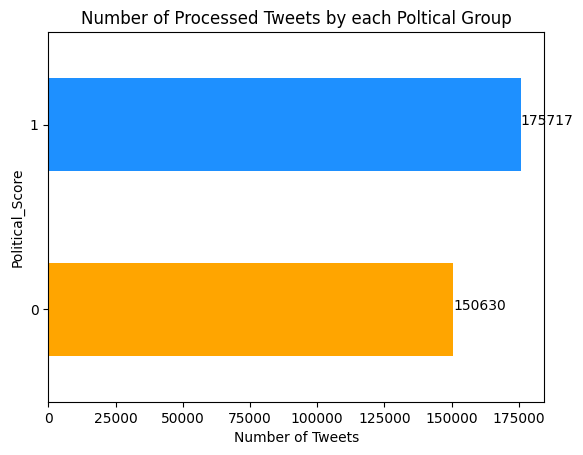

In [28]:
x1 = processed_tweets.groupby('Political_Score').Tweet.count().sort_values()
c = ['orange', 'dodgerblue']
x1.plot.barh(
    ylim=0, title= 'Number of Processed Tweets by each Poltical Group', color = c)
for index, value in enumerate(x1):
    plt.text(value, index,
             str(value))
plt.xlabel('Number of Tweets', fontsize = 10);

## WordCloud(s)

In [29]:
mod_dems_pro =  processed_tweets[processed_tweets['political_group'] == 'Democratic Moderates']
lib_dems_pro =  processed_tweets[processed_tweets['political_group'] == 'Democratic Liberals']
mod_reps_pro =  processed_tweets[processed_tweets['political_group'] == 'Republican Moderates']
con_reps_pro =  processed_tweets[processed_tweets['political_group'] == 'Republican Conservatives']

In [30]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [31]:
stopwords = set(STOPWORDS)

In [32]:
stop_words = stopwords.update(['https', 'amp', 'make', 'need', 'thank', 'year', 'go', 'say', 'let', 'give', 'see', 'say', 'today', 'make', 'sure', 'today', 'know'])

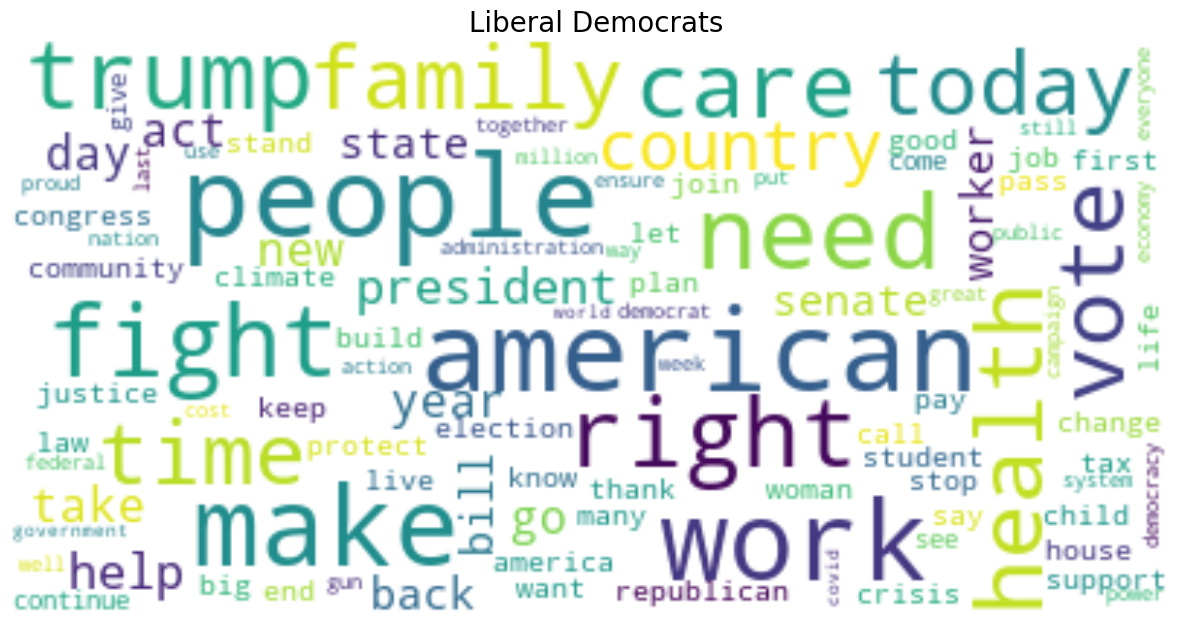

In [34]:
text = " ".join(i for i in lib_dems_pro.Tweet)
wordcloud = WordCloud(stopwords = stop_words, max_font_size=40, collocations=False, background_color="white", max_words = 100).generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(' Liberal Democrats', size = 20)
plt.show()

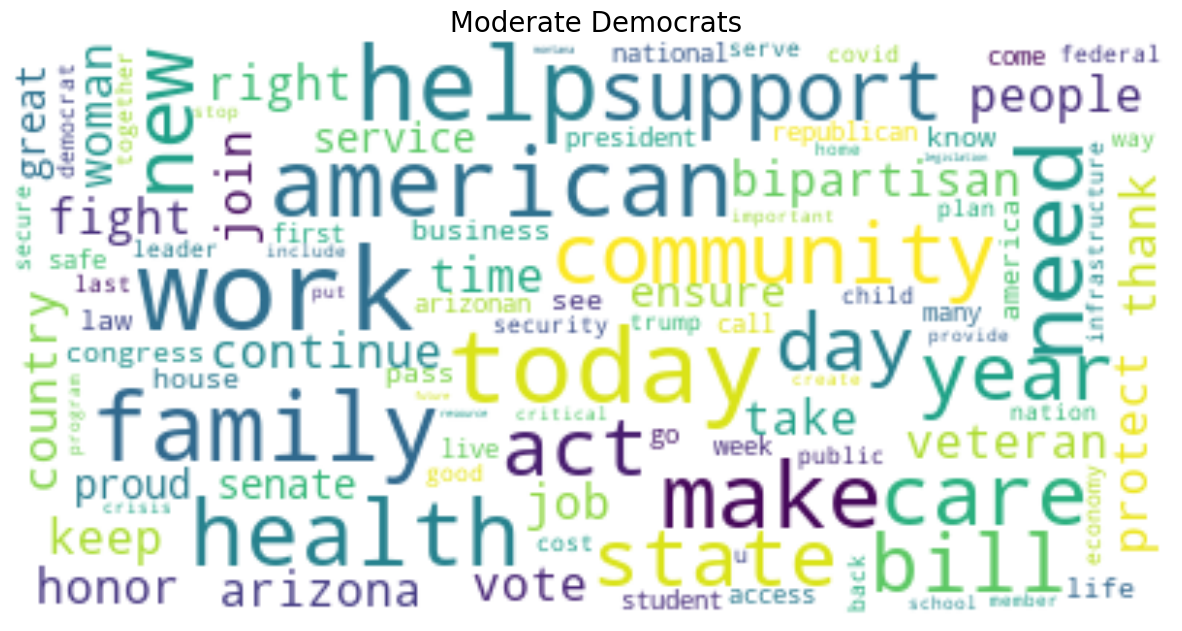

In [35]:
text = " ".join(i for i in mod_dems_pro.Tweet)
wordcloud = WordCloud(stopwords = stop_words, max_font_size=40, collocations=False, background_color="white", max_words = 100).generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(' Moderate Democrats', size = 20)
plt.show()

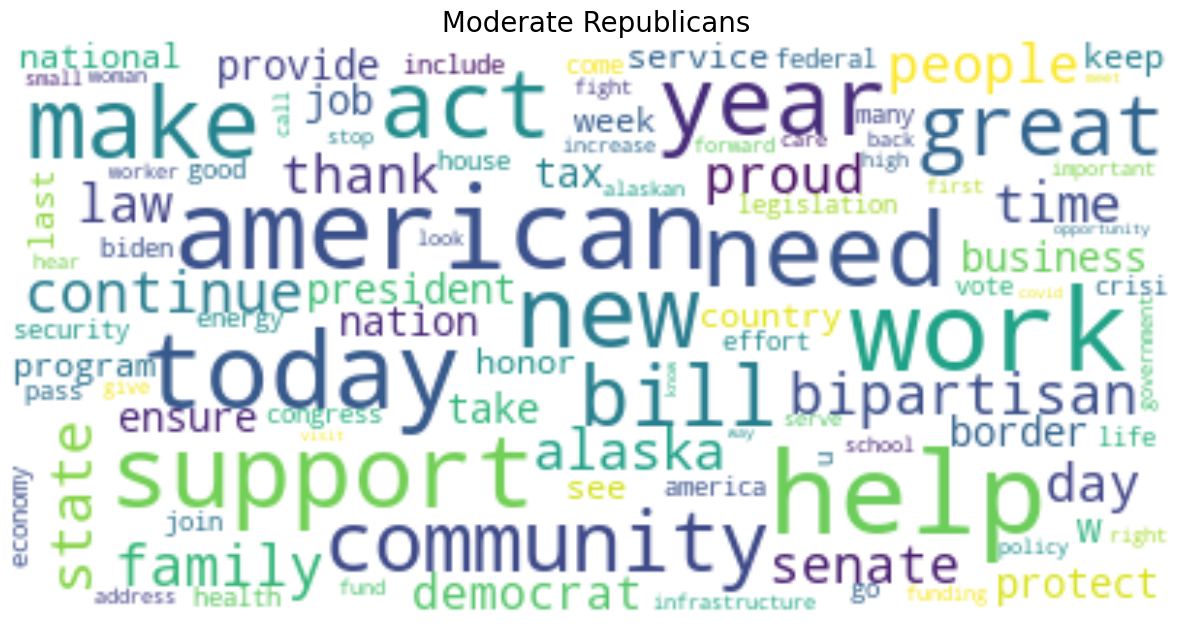

In [36]:
text = " ".join(i for i in mod_reps_pro.Tweet)
wordcloud = WordCloud(stopwords = stop_words, max_font_size=40, collocations=False, background_color="white", max_words = 100).generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(' Moderate Republicans', size = 20)
plt.axis("off")
plt.show()

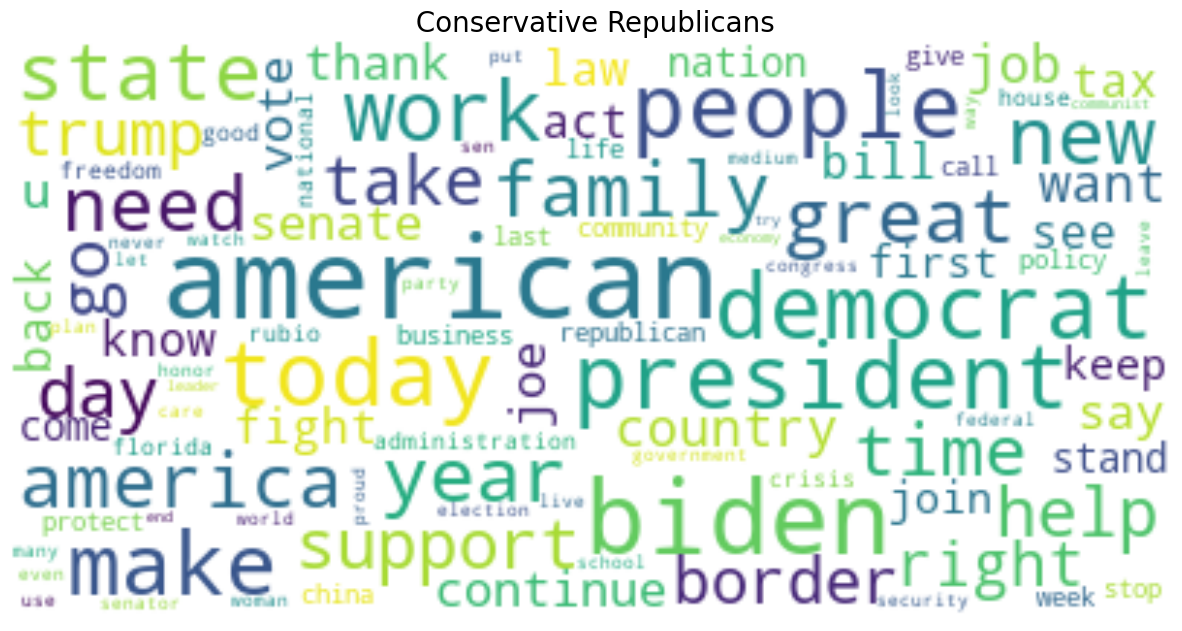

In [37]:
text = " ".join(i for i in con_reps_pro.Tweet)
wordcloud = WordCloud(stopwords = stop_words, max_font_size=40, collocations=False, background_color="white", max_words = 100).generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(' Conservative Republicans', size = 20)
plt.axis("off")
plt.show()

## Vader Sentiment Analysis

In [38]:
sns.set(style="darkgrid")

In [39]:
def sentiment_scores(tweet):
    
    sid_obj = SentimentIntensityAnalyzer()
    
    sentiment_dict = sid_obj.polarity_scores(tweet)
    
    sentiment_dict['compound']  
    
    return(sentiment_dict['compound'])

In [41]:
reps['compound_sentiment'] = reps['Tweet'].apply(lambda x: sentiment_scores(x) )

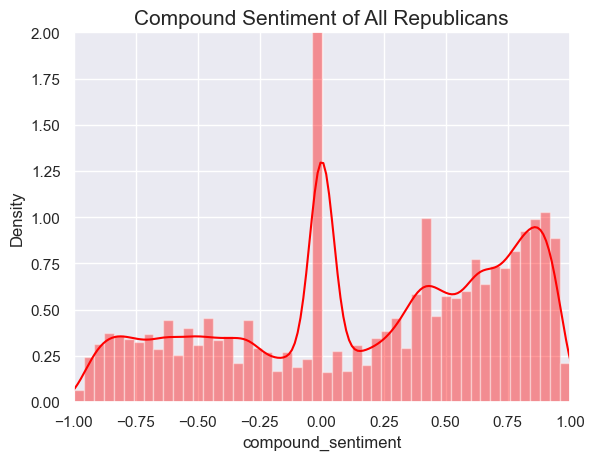

In [45]:
sns.distplot(reps["compound_sentiment"], color = 'red')
ax = plt.gca()
ax.set(xlim=(-1, 1), ylim=(0, 2))
plt.title("Compound Sentiment of All Republicans", fontsize = 15)
plt.show()

In [42]:
dems['compund_sentiment'] = dems['Tweet'].apply(lambda x: sentiment_scores(x) )

In [60]:
dems

,Date,Tweet,Username,Political_Score,Democrat_Score,Republican_Score,political_group,compund_sentiment
0,2017-01-03,GOP’s reversal of plans to destroy the OCE wil...,SpeakerPelosi,1,0.0,NaN,Democratic Moderates,-0.8585
1,2017-01-03,Working families expect us to fight for their ...,SpeakerPelosi,1,0.0,NaN,Democratic Moderates,-0.0516
2,2017-01-03,Tmrw @HouseGOP will destroy the office that pr...,SpeakerPelosi,1,0.0,NaN,Democratic Moderates,-0.5423
3,2017-01-03,"We'll seek common ground, but we'll stand our ...",SpeakerPelosi,1,0.0,NaN,Democratic Moderates,0.5927
4,2017-01-03,I offer my congratulations to the Speaker of t...,SpeakerPelosi,1,0.0,NaN,Democratic Moderates,0.7906
...,...,...,...,...,...,...,...,...
385962,2022-11-18,"Today in Bangkok, I convened leaders from Japa...",VP,1,1.0,NaN,Democratic Liberals,0.0000
385963,2022-11-18,I really love the many teachers who every sing...,CoryBooker,1,1.0,NaN,Democratic Liberals,0.9485
385964,2022-11-18,America is going back to the Moon!\n\nhttps://...,amyklobuchar,1,1.0,NaN,Democratic Liberals,0.0000
385965,2022-11-18,We’re hiring! Our office is seeking a Policy A...,RepAOC,1,1.0,NaN,Democratic Liberals,0.7345


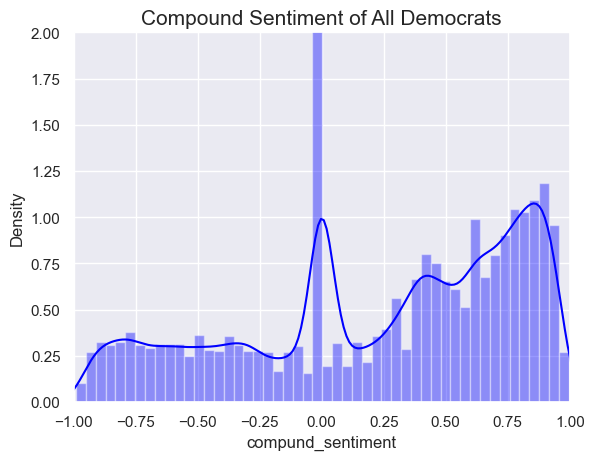

In [44]:
sns.distplot(dems["compund_sentiment"], color = 'blue')
ax = plt.gca()
ax.set(xlim=(-1, 1), ylim=(0, 2))
plt.title("Compound Sentiment of All Democrats", fontsize = 15)
plt.show()

In [268]:
con_reps['compund_sentiment'] = con_reps['Tweet'].apply(lambda x: sentiment_scores(x) )

In [69]:
con_reps.rename(columns={"compund_sentiment": "Positivity"}, inplace = True)
con_reps

,Date,Tweet,Username,Political_Score,Democrat_Score,Republican_Score,political_group
43,2017-01-20,Congratulations to @mike_pence on becoming the...,LeaderMcConnell,0,NaN,1.0,Republican Conservatives
48,2017-01-20,@MomToBea @GloryCorinne I have serious concern...,marcorubio,0,NaN,1.0,Republican Conservatives
52,2017-01-20,#Repost foxnews\n・・・\nViewers enjoyed a specta...,DonaldJTrumpJr,0,NaN,1.0,Republican Conservatives
53,2017-01-20,Wow. Just saw this pic of Kai and her grandpa ...,DonaldJTrumpJr,0,NaN,1.0,Republican Conservatives
54,2017-01-20,This morning I joined @Morning_Joe to discuss ...,SenTomCotton,0,NaN,1.0,Republican Conservatives
...,...,...,...,...,...,...,...
382744,2022-11-01,"One week, America. \n\nLet’s finish strong!",laurenboebert,0,NaN,1.0,Republican Conservatives
382745,2022-11-01,Happy Independence Day to the people of Antigu...,SenRubioPress,0,NaN,1.0,Republican Conservatives
382746,2022-11-01,"Welcome to Florida, @JoeBiden.\n\nLook forward...",ScottforFlorida,0,NaN,1.0,Republican Conservatives
382747,2022-11-01,"Lots of editorializing in this “news”article, ...",tedcruz,0,NaN,1.0,Republican Conservatives


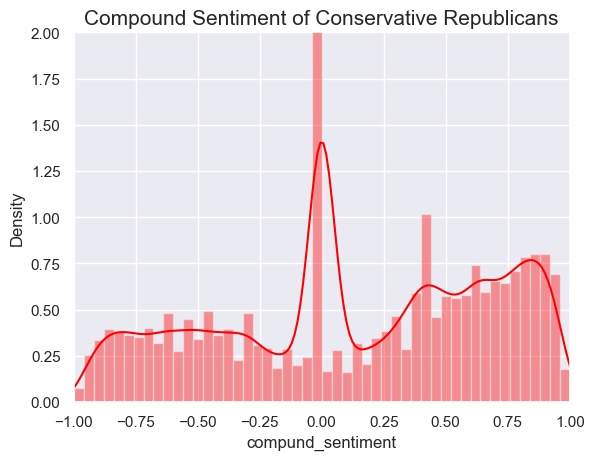

In [235]:
sns.distplot(con_reps["compund_sentiment"], color = 'red')
ax = plt.gca()
ax.set(xlim=(-1, 1), ylim=(0, 2))
plt.title("Compound Sentiment of Conservative Republicans", fontsize = 15)
plt.show()

In [52]:
mod_reps['compund_sentiment'] = mod_reps['Tweet'].apply(lambda x: sentiment_scores(x) )

In [56]:
mod_reps.rename(columns={"compund_sentiment": "compound_sentiment"}, inplace = True)
mod_reps

,Date,Tweet,Username,Political_Score,Democrat_Score,Republican_Score,political_group,compound_sentiment
98,2017-01-20,Let's get Washington out of the way and unleas...,SteveScalise,0,NaN,0.0,Republican Moderates,0.4215
99,2017-01-20,More scenes from today's historic #inauguratio...,senrobportman,0,NaN,0.0,Republican Moderates,0.3400
100,2017-01-20,"Together, the @HouseGOP, @SenateGOP and @POTUS...",SteveScalise,0,NaN,0.0,Republican Moderates,0.6588
101,2017-01-20,"Congratulations to @realDonaldTrump, the 45th ...",JudgeCarter,0,NaN,0.0,Republican Moderates,0.9039
102,2017-01-20,I look forward to working with the 45th Presid...,SenShelby,0,NaN,0.0,Republican Moderates,0.4215
...,...,...,...,...,...,...,...,...
385945,2022-11-18,Our district offices will be closed today and ...,RepJacobs,0,NaN,0.0,Republican Moderates,0.4404
385946,2022-11-18,Cartels have capitalized off the chaos at our ...,JudgeCarter,0,NaN,0.0,Republican Moderates,-0.3382
385947,2022-11-18,Military families across the country will bene...,RepMikeGarcia,0,NaN,0.0,Republican Moderates,0.7269
385948,2022-11-18,This is an important step for justice and acco...,senrobportman,0,NaN,0.0,Republican Moderates,0.1280


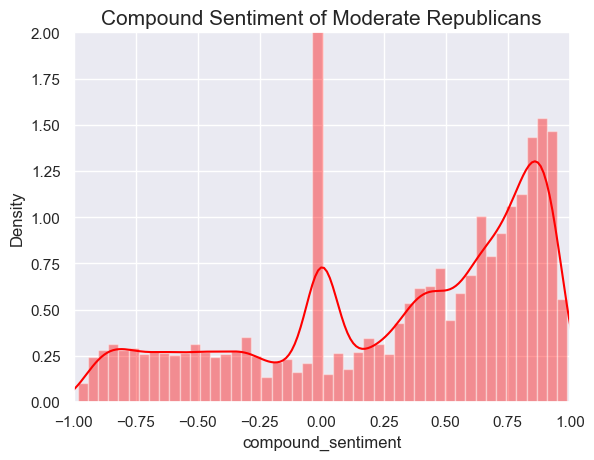

In [57]:
sns.distplot(mod_reps["compound_sentiment"], color = 'red')
ax = plt.gca()
ax.set(xlim=(-1, 1), ylim=(0, 2))
plt.title("Compound Sentiment of Moderate Republicans", fontsize = 15)
plt.show()

In [47]:
mod_dems['compound_sentiment'] = mod_dems['Tweet'].apply(lambda x: sentiment_scores(x) )

In [72]:
mod_dems.rename(columns={"compund_sentiment": "Positivity"}, inplace = True)
mod_dems

,Date,Tweet,Username,Political_Score,Democrat_Score,Republican_Score,political_group
0,2017-01-03,"Watch LIVE as I address the 115th Congress, un...",SpeakerPelosi,1,0.0,NaN,Democratic Moderates
1,2017-01-03,GOP’s reversal of plans to destroy the OCE wil...,SpeakerPelosi,1,0.0,NaN,Democratic Moderates
2,2017-01-03,We open this Congress by paying tribute to tho...,SpeakerPelosi,1,0.0,NaN,Democratic Moderates
3,2017-01-03,To @POTUS and @VP: thank you for your counsel ...,SpeakerPelosi,1,0.0,NaN,Democratic Moderates
4,2017-01-03,We have the responsibility and the power to li...,SpeakerPelosi,1,0.0,NaN,Democratic Moderates
...,...,...,...,...,...,...,...
383477,2022-11-13,Tucsonans: two Tucson nonprofits – @GRMTucson ...,kyrstensinema,1,0.0,NaN,Democratic Moderates
383481,2022-11-14,Big week folks. Big wins but we gotta keep go...,DougJones,1,0.0,NaN,Democratic Moderates
383483,2022-11-14,Arizona is home to 22 federally recognized Tri...,kyrstensinema,1,0.0,NaN,Democratic Moderates
383484,2022-11-14,"The world has left incrementalism in the dust,...",SpeakerPelosi,1,0.0,NaN,Democratic Moderates


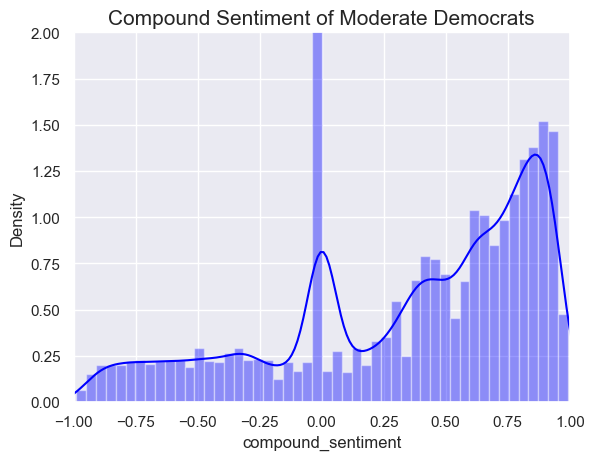

In [53]:
sns.distplot(mod_dems["compound_sentiment"], color = 'blue')
ax = plt.gca()
ax.set(xlim=(-1, 1), ylim=(0, 2))
plt.title("Compound Sentiment of Moderate Democrats", fontsize = 15)
plt.show()

In [48]:
lib_dems['compund_sentiment'] = lib_dems['Tweet'].apply(lambda x: sentiment_scores(x) )

In [276]:
lib_dems.rename(columns={"compund_sentiment": "Positivity"}, inplace = True)
lib_dems

,Date,Tweet,Username,Political_Score,Democrat_Score,Republican_Score,political_group,Positivity
136,2017-01-20,So here’s the deal: our ideals are at stake ri...,KamalaHarris,1,1.0,NaN,Democratic Liberals,-0.2023
137,2017-01-20,"Today will be a tough day, but we can't throw ...",SenSanders,1,1.0,NaN,Democratic Liberals,-0.8463
138,2017-01-20,I'm sharing these thoughts with you on the day...,PramilaJayapal,1,1.0,NaN,Democratic Liberals,0.4735
139,2017-01-20,I was able to live my American dream for one s...,PramilaJayapal,1,1.0,NaN,Democratic Liberals,0.2500
140,2017-01-20,I emigrated to the US from India at 16. My par...,PramilaJayapal,1,1.0,NaN,Democratic Liberals,0.1779
...,...,...,...,...,...,...,...,...
382764,2022-11-01,This is the choice this November.\nhttps://t.c...,TheDemocrats,1,1.0,NaN,Democratic Liberals,0.0000
382765,2022-11-01,"At least 10,000 decisions that the government ...",ewarren,1,1.0,NaN,Democratic Liberals,0.5574
382766,2022-11-01,"If anyone has Nevada's back, it's Catherine @C...",amyklobuchar,1,1.0,NaN,Democratic Liberals,0.0000
382767,2022-11-01,Democrats will protect Social Security.\nWe’ll...,JoeBiden,1,1.0,NaN,Democratic Liberals,0.7579


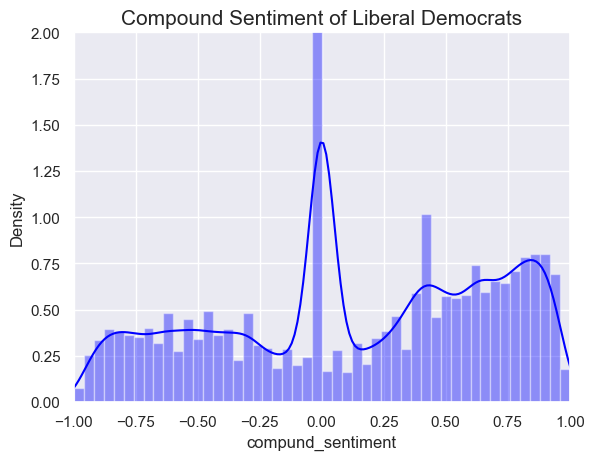

In [255]:
sns.distplot(con_reps["compund_sentiment"], color = 'blue')
ax = plt.gca()
ax.set(xlim=(-1, 1), ylim=(0, 2))
plt.title("Compound Sentiment of Liberal Democrats", fontsize = 15)
plt.show()

In [257]:
lib_dems['Date']= pd.to_datetime(lib_dems['Date'])
mod_dems['Date']= pd.to_datetime(mod_dems['Date'])
con_reps['Date']= pd.to_datetime(con_reps['Date'])
mod_reps['Date']= pd.to_datetime(mod_reps['Date'])

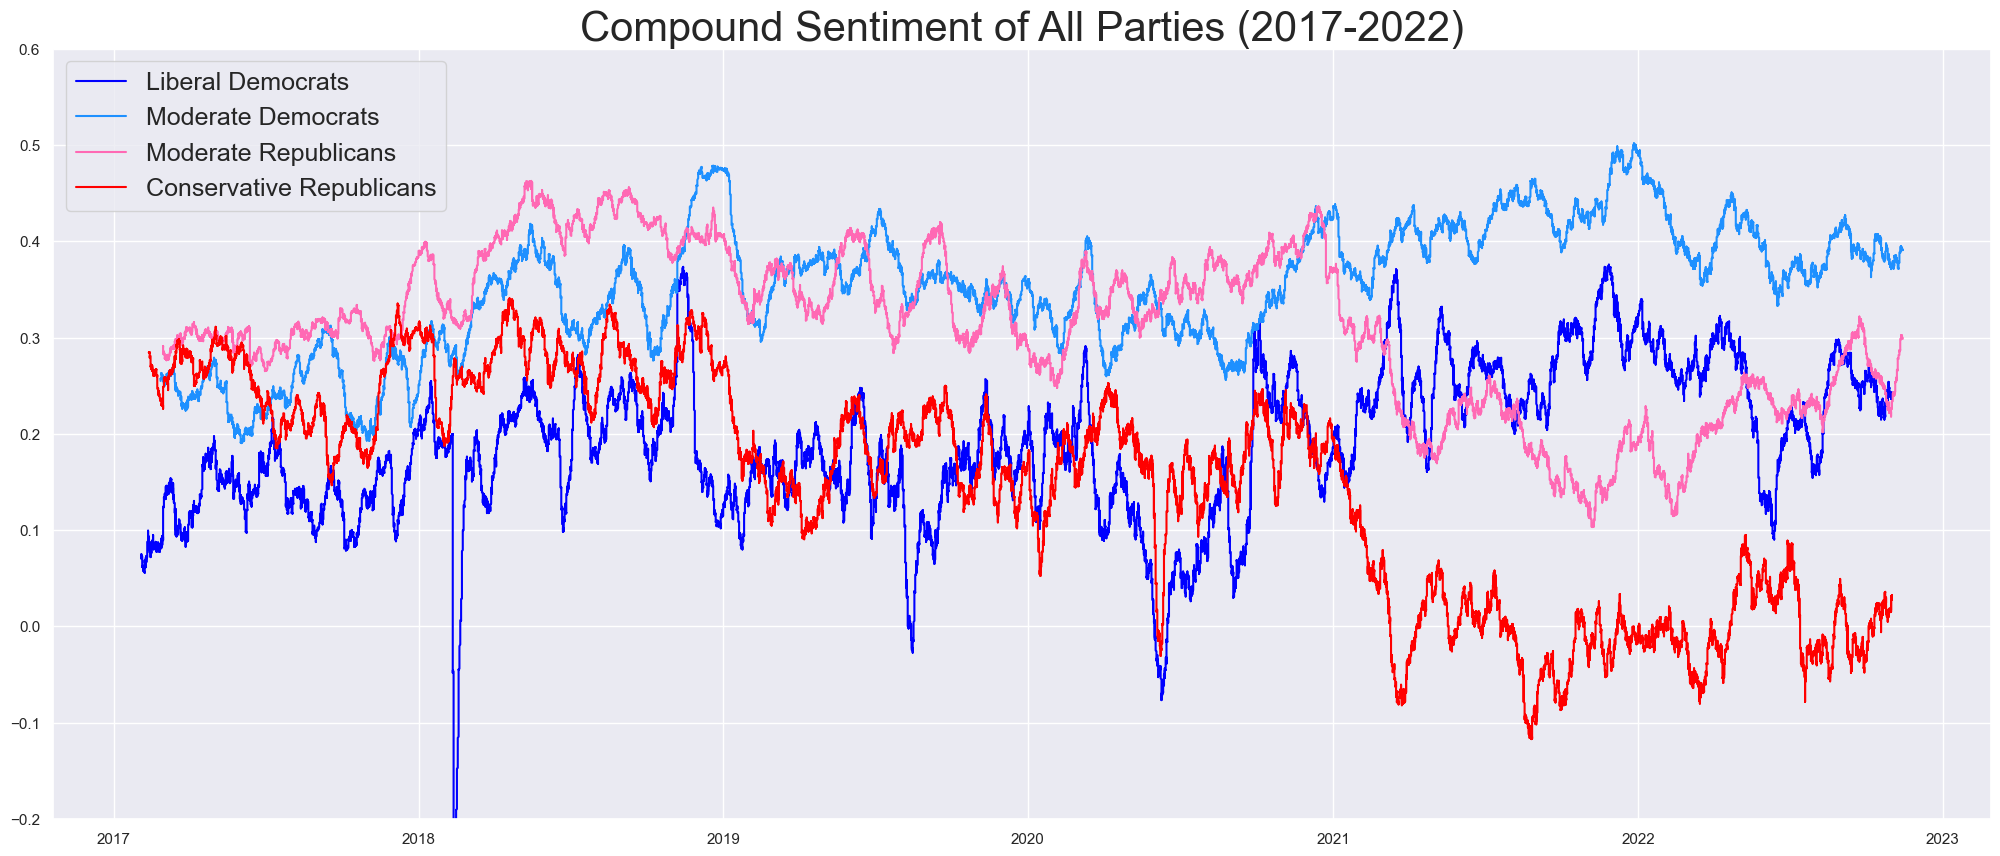

In [396]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.title("Compound Sentiment of All Parties (2017-2022)", fontsize = 30)

date = lib_dems.Date
value = lib_dems.Positivity.rolling(1000).mean()
ax.plot(date, value, color = 'blue', label = 'Liberal Democrats');

date1 = mod_dems.Date
value1 = mod_dems.Positivity.rolling(1000).mean()
ax.plot(date1, value1, color = 'dodgerblue', label = 'Moderate Democrats');

date2 = mod_reps.Date
value2 = mod_reps.Positivity.rolling(1000).mean()
ax.plot(date2, value2, color = 'hotpink', label = 'Moderate Republicans');

date3 = con_reps.Date
value3 = con_reps.Positivity.rolling(1000).mean()
ax.plot(date3, value3, color = 'red', label = 'Conservative Republicans');
plt.ylim([-0.2, 0.6])
leg = ax.legend(fontsize = 18);

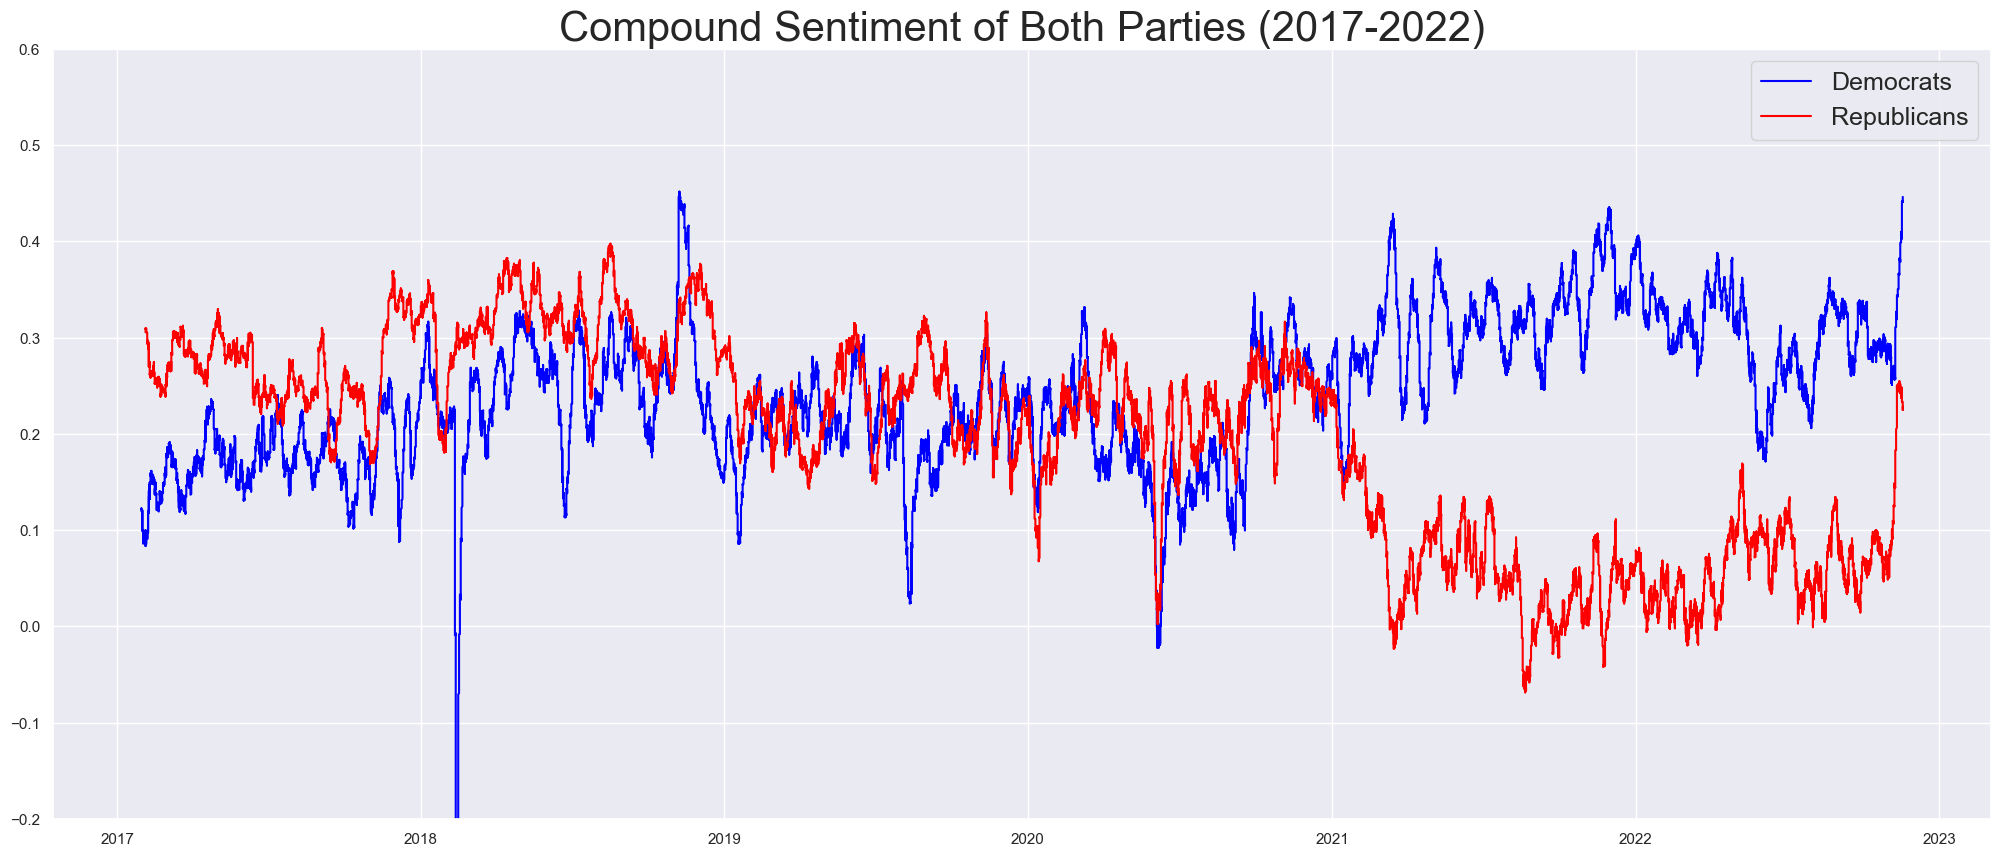

In [62]:
reps['Date']= pd.to_datetime(reps['Date'])
dems['Date']= pd.to_datetime(dems['Date'])

fig, ax = plt.subplots(figsize=(25, 10))
plt.title("Compound Sentiment of Both Parties (2017-2022)", fontsize = 30)

date = dems.Date
value = dems.compund_sentiment.rolling(1000).mean()
ax.plot(date, value, color = 'blue', label = 'Democrats');

date1 = reps.Date
value1 = reps.compound_sentiment.rolling(1000).mean()
ax.plot(date1, value1, color = 'red', label = 'Republicans');

plt.ylim([-0.2, 0.6])
leg = ax.legend(fontsize = 18);